### Kaggles's House Price Prediction Problem

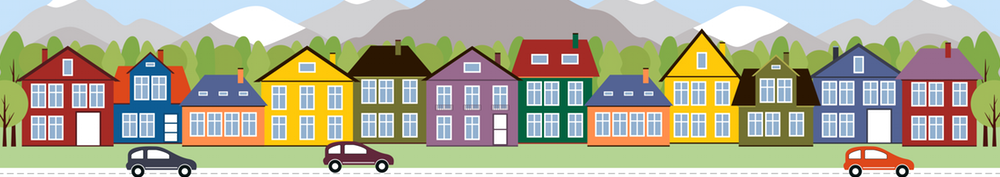

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

###### Libraries Import

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

###### Data Import

In [2]:
#import the dataset
train = pd.read_csv('Data/Train.csv').drop('Id',axis = 1)
test = pd.read_csv('Data/Test.csv').drop('Id',axis = 1)

In [3]:
MSSubClass_features = {
20:"1-STORY 1946 & NEWER ALL STYLES",
30:"1-STORY 1945 & OLDER",
40:"1-STORY W/FINISHED ATTIC ALL AGES",
45:"1-1/2 STORY - UNFINISHED ALL AGES",
50:"1-1/2 STORY FINISHED ALL AGES",
60:"2-STORY 1946 & NEWER",
70:"2-STORY 1945 & OLDER",
75:"2-1/2 STORY ALL AGES",
80:"SPLIT OR MULTI-LEVEL",
85:"SPLIT FOYER",
90:"DUPLEX - ALL STYLES AND AGES",
120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
150:"1-1/2 STORY PUD - ALL AGES",
160:"2-STORY PUD - 1946 & NEWER",
180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"}

In [4]:
train['MSSubClass'].replace(MSSubClass_features,inplace = True)
test['MSSubClass'].replace(MSSubClass_features,inplace = True)

In [5]:
#Check the dimensions of the train and test set

train.shape,test.shape

((1460, 80), (1459, 79))

##### Exploratory Data Analysis

1. Univariate Analysis
2. Bivariate Analysis

In [6]:
train.head()
#We should get back all the categories that have been converted in this dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### Plotting functions for univariate and bivariate analysis

In [7]:
# Distplot
def dist_plot(col,train = train,test = test,log_transform = False):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    
    fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,4))
    
    if log_transform == True:
        sns.distplot(np.log(train[col]),ax = ax[0])
        ax[0].set_title('TrainSet')
        sns.distplot(np.log(test[col]),ax = ax[1])   
        ax[1].set_title('TestSet')
        plt.suptitle(col)
        plt.tight_layout()
        plt.show()
        
    else:
        sns.distplot(train[col],ax = ax[0])
        ax[0].set_title('TrainSet')
        sns.distplot(test[col],ax = ax[1])   
        ax[1].set_title('TestSet')
        plt.suptitle(col)
        plt.tight_layout()
        plt.show()

In [8]:
# Barh plot
def barh_plot(col,train = train,test = test):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    
    dat_train = train[col].value_counts().sort_values(ascending = True)
    xtrain = list(dat_train.index)
    ytrain = list(dat_train.values)
    
    dat_test = test[col].value_counts().sort_values(ascending = True)
    xtest = list(dat_test.index)
    ytest = list(dat_test.values)
    
    
    fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,4))
    ax[0].barh(xtrain,ytrain)
    ax[0].set_title('Train Set')
    ax[1].barh(xtest,ytest)
    ax[1].set_title('Test Set')
    plt.suptitle(col)

In [9]:
# Boxplot
def box_plot(col,train = train):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    
    plt.figure(figsize = (15,6))
    plt.title(col)
    plt.xticks(rotation = 90)
    sns.boxplot(col,'SalePrice',data = train)
    plt.show()

In [10]:
def scatter_plot(col,train = train, color = 'b'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    
    plt.figure(figsize = (15,6))
    sns.scatterplot(col,'SalePrice',data = train,color = color)
    plt.show()

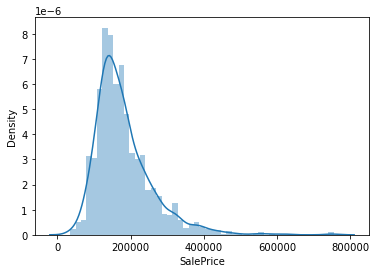

In [11]:
#Target variable 
sns.distplot(train['SalePrice'])
plt.show()

#Inf: SalePrice is a quantity that is bound to be skewed.

In [12]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

###### We will be keeping all the values since we want the machine to learn a realistic pattern. If however there were negative values we would remove it since SalePrice cannot be negative.

### First Submission RMSE: 0.42577

* Average

In [67]:
def rmse(ytest,ypred):
    from sklearn.metrics import mean_squared_error
    import numpy as np
    RMSE = np.sqrt(mean_squared_error(np.log(ytest),np.log(ypred)))
    return RMSE

In [14]:
def solution_generator(predictions):
    sub_samp = pd.read_csv('Data/sample_submission.csv')
    return pd.DataFrame({'Id':sub_samp['Id'],'SalePrice':predictions})

In [15]:
solution = solution_generator(train.SalePrice.mean())
solution.to_csv("Submissions/BaseModel.csv",index = False)

#### Univariate Analysis

In [16]:
# for i in train.select_dtypes(np.number).drop('SalePrice',axis = 1).columns:
#     dist_plot(i,train,test,log_transform = False)

###### Distributions for all the numerical columns are same in both train and test set.

In [17]:
# for i in train.select_dtypes(include = "object").drop('MSSubClass',axis = 1).columns:
#     barh_plot(i)

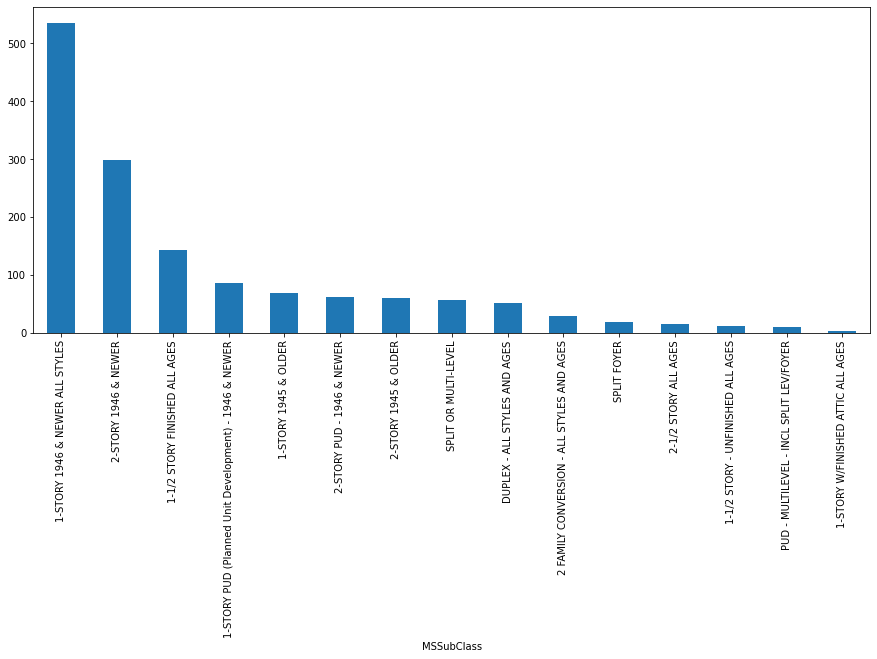

In [18]:
plt.figure(figsize = (15,6))
train.groupby('MSSubClass')['MSSubClass'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

###### Inferences from looking at the value counts for each category.

* **Lot shape** can be converted into 2 features, Regular or irregular.
* **LandSlope and LandContour** could be related.
* We should drop the **Utilities** Column since it has only one value in the test set and hence would have no variation.
* Look to reduce number of **neighbourhood,Condition1,Condition2** parameters.
* **RoofMatl** columns could become CompShg,Tar&Grv,other.
* **Exterior1st,Exterior2nd** BrkComm onwards we could convert as single column in train and testset.
* Convert **Functional,Electrical** into 2 columns only.
* In **GarageType** combine detchd and car port as single val called detachd, attchd and built-in as one val.
* **PavedDrive** and Alley could have some relation.
* **SaleType** Change all CO to contract to reduce a few values in the feature.
* **SaleCondition** could be reduced to 4 values. 

Looking at the columns with SalePrice in bivariate analysis will give us a clearer picture of which columns we can maybe combine.


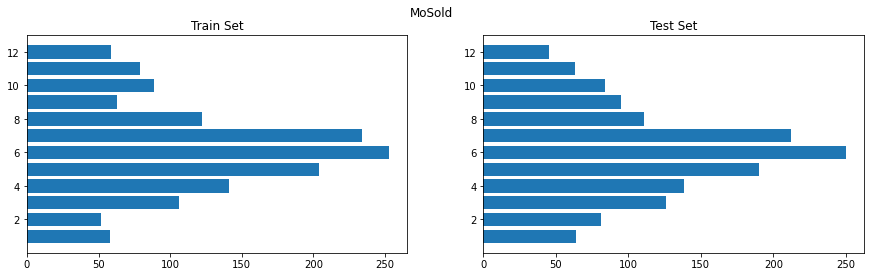

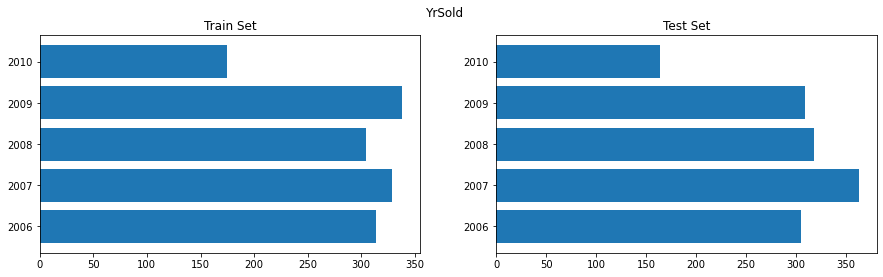

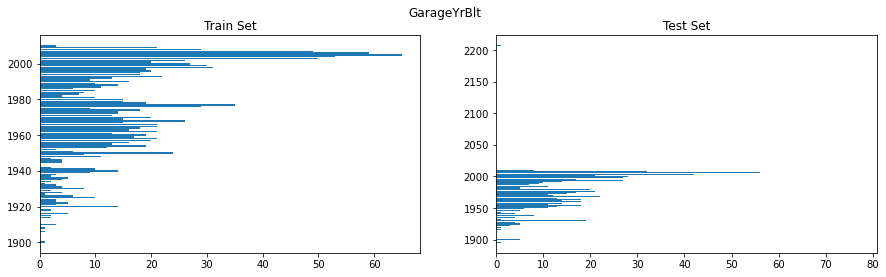

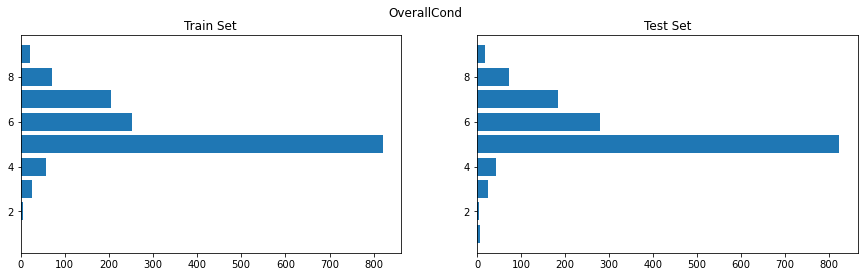

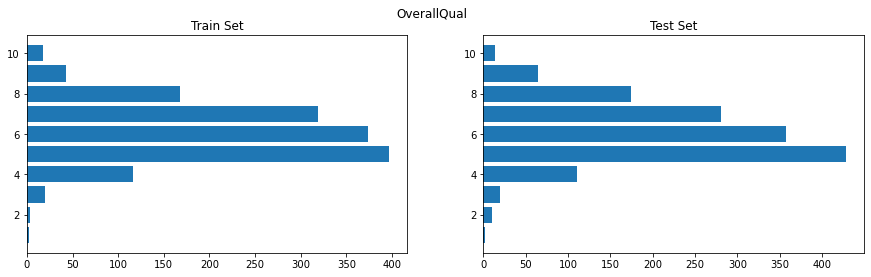

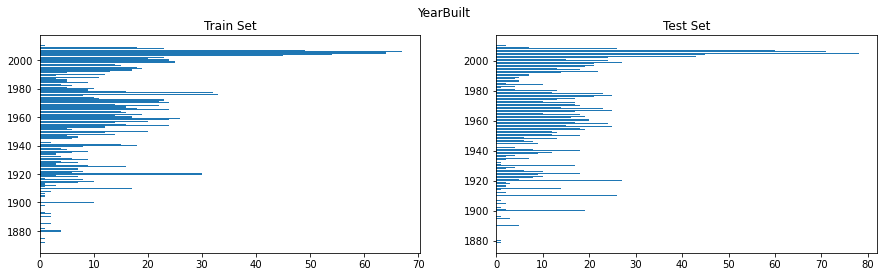

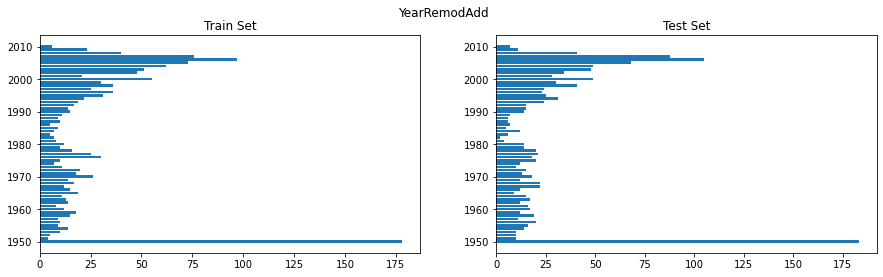

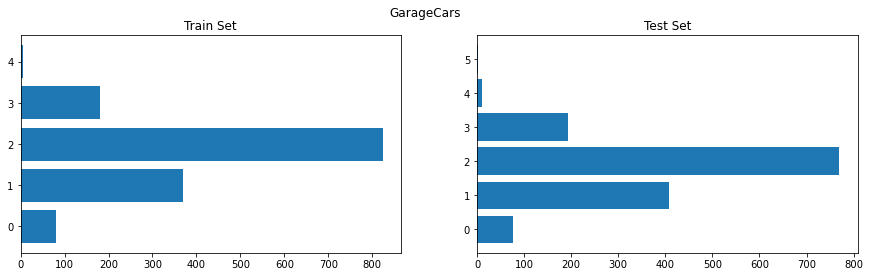

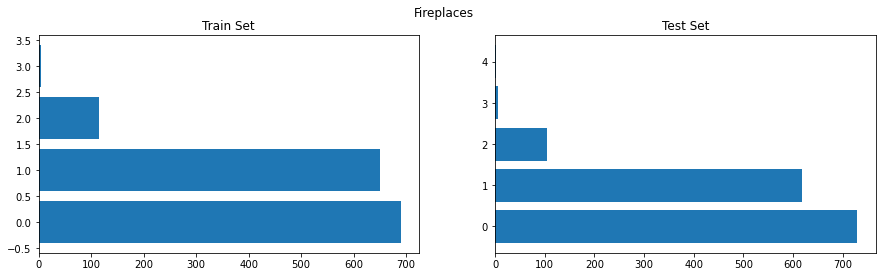

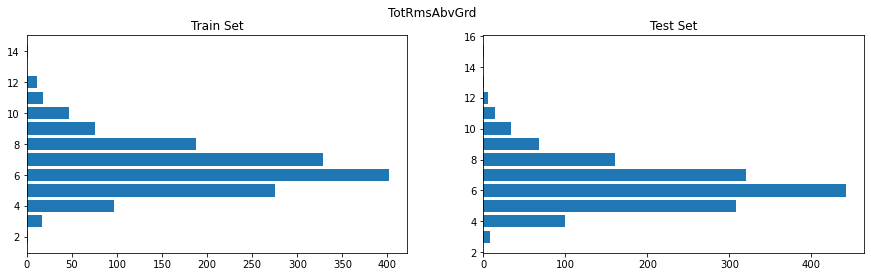

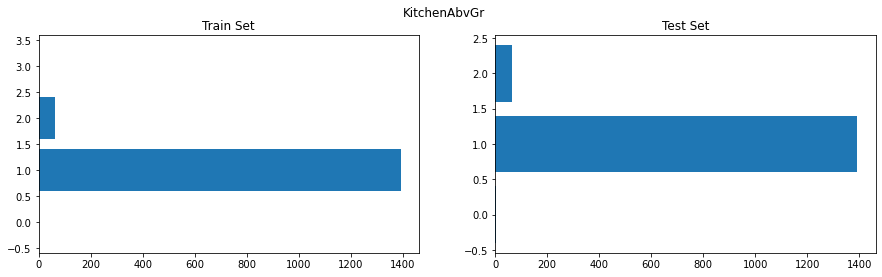

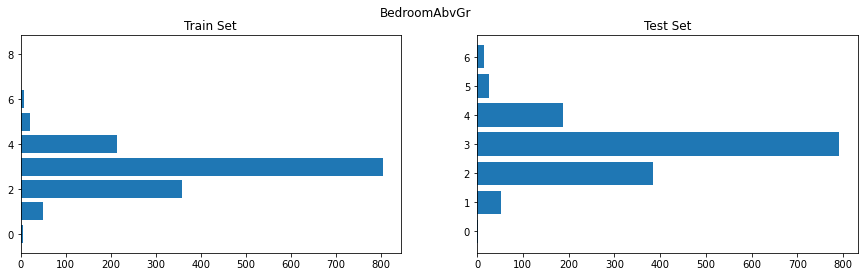

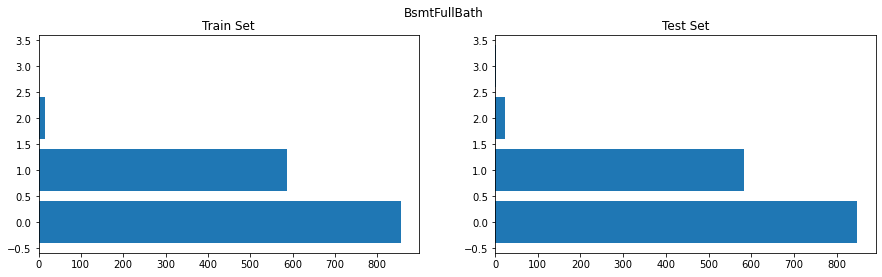

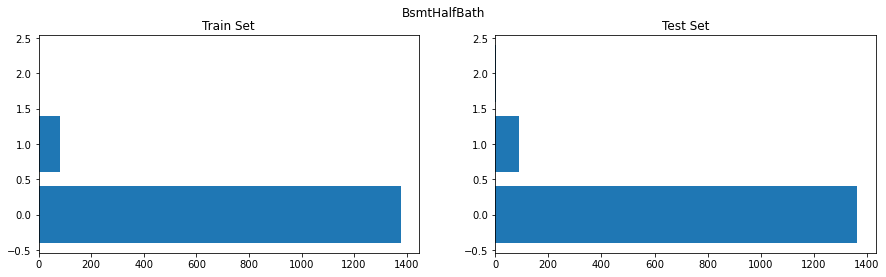

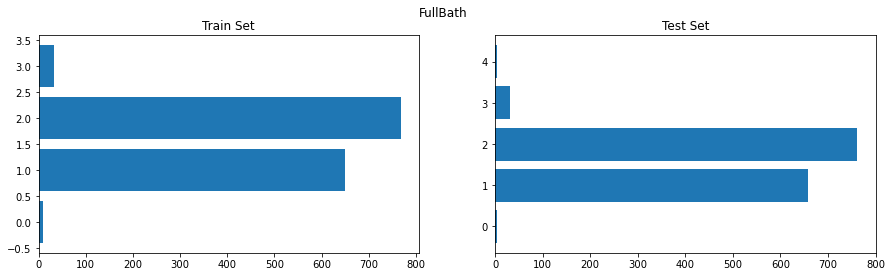

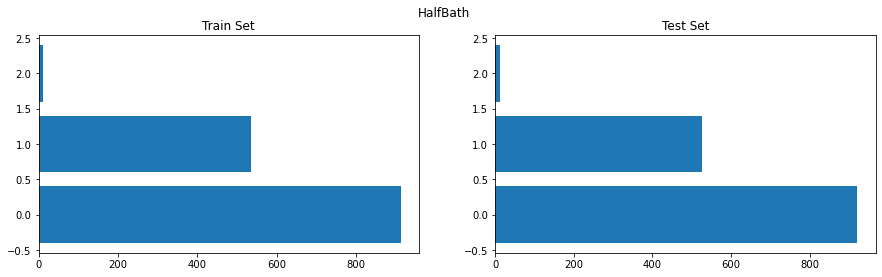

In [19]:
#Numerical variables like year,month,overallcond,overallqual are to be treated as categorical. 
#Let us create their bar plots.
num_bt_cat = train[['MoSold','YrSold','GarageYrBlt','OverallCond',
                    'OverallQual','YearBuilt','YearRemodAdd','GarageCars','Fireplaces',
                    'TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','BsmtFullBath', 
                    'BsmtHalfBath', 'FullBath','HalfBath']]
for i in num_bt_cat:
    barh_plot(i)

* GarageYrBlt has an outlier in the testset. We can try to bin this data as Garage built before 1980 and after 1980.
* Find the difference between **YearBuilt and Year Sold** and **YearRemodAdd and Year Sold**. Thse could be imp features.
* Finally if the imputations are valid then drop any columns that were used to make imputations to prevent collinearity.
* **MonthSold** may or maynot affect price. Bivariate Analysis required.
* **FirePlaces** can be binned into 0,1,more than 1 fire place.
* **HalfBath** can be converted into Yes and No.
* **WoodDeckSF 	OpenPorchSF 	EnclosedPorch 	3SsnPorch 	ScreenPorch 	PoolArea** Maybe can be combined.

#### Bivariate Analysis

In [20]:
bivar_data_continuous = train.select_dtypes(np.number).drop(num_bt_cat.columns,axis = 1)

In [21]:
# fig,ax = plt.subplots(nrows = 5,ncols = 4,figsize = (15,10))
# for variables,plotsubs in zip(bivar_data_continuous.drop(['SalePrice'],axis = 1).columns,ax.flatten()):
    
#     sns.scatterplot(variables,'SalePrice',data = train,ax = plotsubs)
#     plt.tight_layout()
# plt.show()

###### There are many continuous variables that have many zero values which means that that particular property does not have that particular feature. Let us now create boxplots to see whether there is an impact of each category on sale price for each categorical feature.

In [22]:
# for i in train.select_dtypes(include = "object").columns:
#     box_plot(i,train = train)

### Summary of Bivariate Analysis

* From the scatterplots we can see that most of the continuous variables exhibit linear relation with the SalePrice. However there are variables that have zeros in the data. There are also missing values in the features that must be treated. We should also see logically whether it makes sense that properties with a high sale price lack certain ammenities and features.


* **MSSubClass**: 
* **MSZoning,Street,Alley,LandContour,LotConfig,LandSlope**: Features seem to have different median and IQR of SalePrice for each Category.
* **LotShape**: We can combine IR(Irregular) columns into one value so that this feature has only 2 values.
* **Utilities**: Drop this column since it has only one major value AllPub. This will have no predictive power in the model.
* **Neighborhood**:


### Feature Engineering 

In [23]:
#Combining train and test to do feature engineering imputations.
combined = pd.concat((train,test))
train.shape,test.shape,combined.shape

((1460, 80), (1459, 79), (2919, 80))

###### Imputing the missing values

In [24]:
combined.isnull().sum()[combined.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [25]:
#MSZoning

# combined['MSZoning'].value_counts()
# combined[combined['MSZoning'].isna()]
# combined.groupby(['MSZoning','MSSubClass'])['MSZoning'].count()
combined['MSZoning'] = combined['MSZoning'].fillna(combined['MSZoning'].mode().values[0])

In [26]:
#LotFrontage
# combined.groupby('MSZoning')['LotFrontage'].mean()

combined['LotFrontage'] = combined.groupby('MSSubClass')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
combined['LotFrontage'] = combined.groupby('MSZoning')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [27]:
#Alley
combined['Alley'] = combined['Alley'].fillna('No Alley Access')

In [28]:
#LandContour and LandSlope relation check
from scipy.stats import chi2_contingency
stat,pval,dfdm,exp_freq = chi2_contingency(pd.crosstab(train['LandContour'],train['LandSlope']))
print(pval)
print("There is significant difference between LandContour and LandSlope since it is less than 0.05. Hence we won't combine the 2 features")

9.713338917216342e-130
There is significant difference between LandContour and LandSlope since it is less than 0.05. Hence we won't combine the 2 features


In [29]:
# Drop Utilities column from combined data
combined.drop('Utilities',axis = 1,inplace = True)

In [30]:
#Look to reduce number of neighbourhood columns

# Find the IQR of saleprice for each category
Q1 = combined.groupby('Neighborhood')['SalePrice'].quantile(0.25)
Q3 = combined.groupby('Neighborhood')['SalePrice'].quantile(0.75)
IQR = Q3-Q1
IQR
n_data = pd.DataFrame({"Q1":Q1,"Q3":Q3,"IQR":IQR})

#now create bins based on differences in IQR
n_data['IQR'].sort_values()

n_data['Div_by_1000'] = n_data['IQR']/1000

n_data.sort_values(by = 'IQR')

#Looking at the sorted values I have decided to create 6 bins for these columns
n_bins_dict = {
               "G1": n_data[(n_data['Div_by_1000']>7) & (n_data['Div_by_1000']<15)].index,
               "G2": n_data[(n_data['Div_by_1000']>20) & (n_data['Div_by_1000']<30)].index,
               "G3": n_data[(n_data['Div_by_1000']>30) & (n_data['Div_by_1000']<45)].index,
               "G4": n_data[(n_data['Div_by_1000']>45) & (n_data['Div_by_1000']<70)].index,
               "G5": n_data[(n_data['Div_by_1000']>70) & (n_data['Div_by_1000']<80)].index,
               "G6": n_data[(n_data['Div_by_1000']>90) & (n_data['Div_by_1000']<100)].index,
               "MaxG": n_data[n_data['Div_by_1000']>100].index
              }

#Assigning the bin values to each unique record
binning = []
for nindex in n_data.index:
    for keys,values in n_bins_dict.items():
        for j in values:
            if nindex == j:
                binning.append(keys)
            else:
                pass
            
n_data['bins'] = binning

    
#Mapping the obtained dictionary to the Neighborhood column
combined['Neighborhood_binned'] = combined['Neighborhood'].map(dict(zip(n_data.index,n_data['bins'])))

combined.drop('Neighborhood',axis = 1,inplace = True)

# box_plot('Neighborhood_binned',combined)

In [31]:
# Looking to reduce Condition parameters
# Let us check whether there is similarity between condition1 and condition2 using Chi Square.
from scipy.stats import chi2_contingency
teststat,pval,dfdm,exp_freq = chi2_contingency(pd.crosstab(combined['Condition1'],combined['Condition2']))
print(pval)
print('Condition1 and Condition2 are independent of each other.')

1.0077728706229287e-197
Condition1 and Condition2 are independent of each other.


In [32]:
#Combine RR columns,Pos
new_feat = ['PosFeat','PosFeat','Next_to_Rail','Next_to_Rail','Next_to_Rail','Next_to_Rail']
old_feat = [ 'PosA','PosN','RRAe', 'RRNn', 'RRAn','RRNe']
cond_feat_dict = dict(zip(old_feat,new_feat))
combined.replace(cond_feat_dict,inplace = True)

In [33]:
#RoofMat1
bin_rm_dict ={'Metal':'Other', 'WdShake':'Other', 'Membran':'Other',
              'Roll':'Other', 'ClyTile':'Other','WdShngl':'Other','Tar&Grv':'Other'}
combined['RoofMatl'] = combined['RoofMatl'].replace(bin_rm_dict)

In [34]:
# Exterior1st

# Find the IQR of saleprice for each category
Q1 = combined.groupby('Exterior1st')['SalePrice'].quantile(0.25)
Q3 = combined.groupby('Exterior1st')['SalePrice'].quantile(0.75)
IQR = Q3-Q1

e1_data = pd.DataFrame({"Q1":Q1,"Q3":Q3,"IQR":IQR})

#now create bins based on differences in IQR

e1_data['IQR_by_1000'] = e1_data['IQR']/1000
e1_data['Exterior1st_count'] = combined.groupby('Exterior1st')['Exterior1st'].count()

e1_data.sort_values(by = 'IQR_by_1000')

#Binning
bin1 = []
bin2 = []
for i in range(len(list(e1_data[e1_data['IQR_by_1000']<75].index))):
    bin1.append("LPrice_prop_ext")
    
for i in range(len(list(e1_data[e1_data['IQR_by_1000']>75].index))):
    bin2.append("HPrice_prop_ext")
    
ext1_dict = dict(zip(list(e1_data[e1_data['IQR_by_1000']<75].index),bin1))
ext1_dict.update(dict(zip(list(e1_data[e1_data['IQR_by_1000']>75].index),bin2)))


combined['Exterior1st'] = combined['Exterior1st'].map(ext1_dict)

combined['Exterior1st'] = combined['Exterior1st'].fillna(method = 'bfill')

In [35]:
# Exterior2nd

# Find the IQR of saleprice for each category
Q1 = combined.groupby('Exterior2nd')['SalePrice'].quantile(0.25)
Q3 = combined.groupby('Exterior2nd')['SalePrice'].quantile(0.75)
IQR = Q3-Q1

e2_data = pd.DataFrame({"Q1":Q1,"Q3":Q3,"IQR":IQR})

#now create bins based on differences in IQR

e2_data['IQR_by_1000'] = e2_data['IQR']/1000
e2_data['Exterior2nd_count'] = combined.groupby('Exterior2nd')['Exterior2nd'].count()

e2_data.sort_values(by = 'IQR_by_1000')

# Binning
bin1 = []
bin2 = []
for i in range(len(list(e2_data[e2_data['IQR_by_1000']<75].index))):
    bin1.append("LPrice_prop_ext")
    
for i in range(len(list(e2_data[e2_data['IQR_by_1000']>75].index))):
    bin2.append("HPrice_prop_ext")
    
ext2_dict = dict(zip(list(e2_data[e2_data['IQR_by_1000']<75].index),bin1))
ext2_dict.update(dict(zip(list(e2_data[e2_data['IQR_by_1000']>75].index),bin2)))

combined['Exterior2nd'] = combined['Exterior2nd'].map(ext2_dict)

combined['Exterior2nd'] = combined['Exterior2nd'].fillna(method = 'bfill')

In [36]:
#Functional
combined['Functional'].value_counts()
comb_vals = ['Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev']
other_vals = []

for i in range(len(comb_vals)):
    other_vals.append("Deductions")
combined['Functional'] = combined['Functional'].replace(dict(zip(comb_vals,other_vals)))

combined['Functional'] = combined['Functional'].fillna(value = 'Typ')

In [37]:
#Electrical
combined['Electrical'] = combined['Electrical'].replace({"FuseA":"Fuse","FuseF":"Fuse","FuseP":"Fuse","Mix":"Fuse"}).fillna('SBrkr')

In [38]:
combined['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [39]:
#GarageType
combined['GarageType'] = combined['GarageType'].replace({"CarPort":"Detchd","BuiltIn":"Attchd","2Types":"Basment"}).fillna('Attchd')

In [40]:
# **SaleType** Change all CO to contract to reduce a few values in the feature.
#Warranty,New,Contract,Other
combined['SaleType'] = combined['SaleType'].replace({'CWD':'WD','ConLI':'Con','ConLw':'Con','ConLD':'Con','COD':'Oth'}).fillna('WD')

In [41]:
#Sale Condition
combined['SaleCondition'] = combined['SaleCondition'].fillna('Normal')

In [42]:
#GarageYrBlt
combined["GarageYrBinned"] = ['Before 2000' if i<2000 else 'After 2000' for i in combined['GarageYrBlt']]
combined = combined.drop('GarageYrBlt',axis = 1)

In [43]:
#Year Built (Bin into before and after 1960)
combined['YearBuilt_Binned'] = ['Before 1960' if i<1960 else 'After 1960' for i in combined['YearBuilt']]

In [44]:
# YearBuilt
combined['YearBlt_diff_YrSold'] = abs(combined['YearBuilt']-combined['YrSold'])
combined.drop('YearBuilt',axis = 1,inplace = True)

In [45]:
#YearRemodAdd
combined["YearRemodAdd_binned"] = ['Before 2000' if i<2000 else 'After 2000' for i in combined['YearRemodAdd']]
combined = combined.drop('YearRemodAdd',axis = 1)


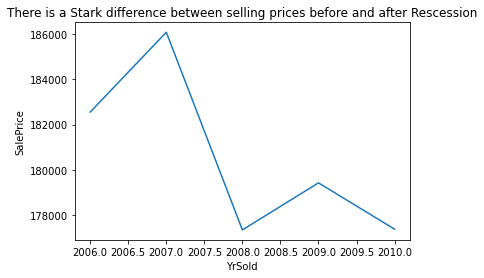

In [46]:
#Year Sold

sns.lineplot(combined['YrSold'],combined['SalePrice'])
plt.title('There is a Stark difference between selling prices before and after Rescession')
plt.show()

#bin YrSold into before and after rescession which hit in 2008

combined['YrSold_Binned'] = ['Before Rescession' if i<2008 else 'After Rescession' for i in combined['YrSold']]
combined = combined.drop('YrSold',axis = 1)

In [47]:
#MoSold
combined['MoSold_binned'] = ["1st half" if i<7 else "2nd half" for i in combined['MoSold']]
combined.drop('MoSold',axis = 1,inplace = True)

In [48]:
#FirePlaces (No imputations required)

In [49]:
combined['Extra_Area'] = combined['WoodDeckSF']+combined['OpenPorchSF']+combined['EnclosedPorch']+combined['3SsnPorch']+combined['ScreenPorch']+combined['PoolArea']
combined.drop(train[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']].columns,axis = 1,inplace = True)

In [50]:
#LotShape
combined['LotShape'] = combined['LotShape'].replace({'IR1':'IR','IR3':'IR'})

In [51]:
combined.isnull().sum()[combined.isnull().sum()!=0] #These values have still not been treated as yet

MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
FireplaceQu     1420
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SalePrice       1459
dtype: int64

## Creating an LR model for checking

In [52]:
checking = combined.dropna(axis = 1,how = 'any').drop('MSSubClass',axis = 1)

In [53]:
t2 = pd.get_dummies(checking,drop_first = True)
t1 = pd.concat((t2,combined['SalePrice']),axis = 1)
train_c = t1[:1460]
test_c = t1[1460:].drop('SalePrice',axis = 1)

### Applying Linear Regression to check if any difference New RMSE: 0.17023. 

* Post feature engineering of half the variables we have seen a massive jump from the base submission which was RMSE of 0.42577

In [54]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x = train_c.drop('SalePrice',axis = 1)
y = train_c.SalePrice
x1 = sm.add_constant(x)

x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 6)

model = OLS(y,x1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     74.24
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:27:02   Log-Likelihood:                -17130.
No. Observations:                1460   AIC:                         3.448e+04
Df Residuals:                    1351   BIC:                         3.505e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [55]:
good_var = model.pvalues[model.pvalues<0.05].index

In [56]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x = train_c[good_var]
y = train_c.SalePrice
x1 = sm.add_constant(x)

x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 6)

model = OLS(y,x1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     241.3
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:27:02   Log-Likelihood:                -17188.
No. Observations:                1460   AIC:                         3.444e+04
Df Residuals:                    1427   BIC:                         3.462e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [57]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [69]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train RMSE:",rmse(y_train,pred_train))
print("Test RMSE:",rmse(y_test,pred_test))
# The Test RMSE is greater than the train RMSE. This means the model is overfitting.

Train RMSE: 0.16572685575856974
Test RMSE: 0.159868205497287


In [59]:
print("Train R2_Score:",r2_score(y_train,pred_train))
print("Test R2_Score:",r2_score(y_test,pred_test))

Train R2_Score: 0.8394478255832976
Test R2_Score: 0.858140535028594


In [60]:
t = sm.add_constant(test_c[good_var])
solution_generator(model.predict(t)).to_csv("Submissions/OLSRegression_f_incomplete.csv",index = False)

### Training on entire train set to see if we see any improvement RMSE: 0.17023

* There is no difference in training on the split set or the entire train set. This means our split train set is covering all major data points required for making predictions.

In [61]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split

x = train_c[good_var]
y = train_c.SalePrice
x1 = sm.add_constant(x)

#x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 6)

model = OLS(y,x1).fit()
print(model.summary())

In [62]:
t = sm.add_constant(test_c[good_var])
solution_generator(model.predict(t)).to_csv("Submissions/OLSRegression_f_incomplete_fulltrain.csv",index = False)

### Resuming with removing null values from rest of the columns

In [70]:
combined.isnull().sum()[combined.isnull().sum()!=0] #These values have still not been treated as yet

MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
FireplaceQu     1420
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SalePrice       1459
dtype: int64